# Epilepsy Detection using EEG Data
### by Vidya Bulusu

## Step 1: Get Data

In [1]:
import numpy as np
import pandas as pd
# from pandas_profiling import ProfileReport

In [2]:
data = pd.read_csv("/Users/vidyabulusu/Desktop/Comp 642 Machine Learning/Final Project/uci-epileptic-seizure-recognition/data/data.csv")

## Step 2: Data Exploration

In [3]:
data.head()

,column_a,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x170,x171,x172,x173,x174,x175,x176,x177,x178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, column_a to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [5]:
data.y.value_counts()

4    2300
1    2300
5    2300
2    2300
3    2300
Name: y, dtype: int64

#### Create a Profile Report and save it as Output.html, using pandas_profiling

In [6]:
# profile = ProfileReport(data, minimal=True)
# profile.to_file("output.html")

## Step 3: Data Transformations and Dimensionality Reduction

In [7]:
import scipy.signal

# checking how scipy periodogram works, using 1 row of data
row1 = data.iloc[1:2, 1:179].to_numpy()[0]

# Remove intercept (mean) from signal before FFT to make sure the signal is about 0
# detrend=linear does this automatically
scipy.signal.periodogram(row1, 178, detrend='linear')


(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
        78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89.]),
 array([1.56806387e-27, 2.29415592e+03, 1.81178176e+04, 6.27403460e+04,
        3.03869264e+04, 1.95002900e+04, 2.84936607e+03, 1.70586216e+04,
        1.85476443e+04, 2.34232128e+03, 2.94766230e+01, 1.04146368e+04,
        2.31870843e+03, 7.69407476e+03, 2.31556759e+03, 6.26267287e+03,
        5.24198467e+03, 2.07138211e+03, 3.33524348e+03, 1.42627243e+03,
        5.61843222e+02, 1.15798023e+03, 6.03998679e+02, 8.21992235e+02,
        1.10566241e+03, 5.14879098e+02, 9.00625838e+02, 5.72

### Frequency bands
The defined frequency bands are: 
0.5 <= delta < 4, 4 <= theta < 8, 8 <= alpha < 12, 12 <= beta <30, gamma >= 30

We now have to compute the total sum of power of each defined band. This can be done by integration of the area under the curve for each band.


In [8]:
# Taken from StackOverflow answer to integration of bandpower

import scipy.integrate

# Calculating the total area under the given frequency band using scipy.integrate.trapezoid
def bandpower(x, fs, fmin, fmax):
    #f, Pxx = scipy.signal.periodogram(x, fs=fs, detrend='linear')    
    f, Pxx = scipy.signal.periodogram(x, fs=fs, detrend='linear')
    ind_min = np.argmax(f >= fmin) - 1
    ind_max = np.argmax(f > fmax) - 1
    return scipy.integrate.trapezoid(Pxx[ind_min: ind_max], f[ind_min: ind_max])


In [9]:
# Check alpha frequency
bandpower(row1, 178, 8, 12)

34656.07142989192

In [10]:
# Check beta frequency
bandpower(row1, 178, 12, 30)

42376.131703152874

In [11]:
# Check theta frequency
bandpower(row1, 178, 4, 8)

92636.06631205048

In [12]:
# Check delta frequency
bandpower(row1, 178, 0.5, 4)

51782.14654031495

In [13]:
# Check gamma frequency
bandpower(row1, 178, 30, 100)

939.6178193243848

In [14]:
rows = data.iloc[:, 1:179]
rows

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [15]:
data["delta"] = rows.apply(lambda x: bandpower(x,178, 0.5, 4), axis=1)
data["theta"] = rows.apply(lambda x: bandpower(x,178, 4, 8), axis=1)
data["alpha"] = rows.apply(lambda x: bandpower(x,178, 8, 12), axis=1)
data["beta"] = rows.apply(lambda x: bandpower(x,178, 12, 30), axis=1)
data["gamma"] = rows.apply(lambda x: bandpower(x,178, 30, 100), axis=1)

In [16]:
data

,column_a,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x175,x176,x177,x178,y,delta,theta,alpha,beta,gamma
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-127,-116,-83,-51,4,1763.171460,1097.645713,346.265657,5455.491542,100.415379
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,156,154,143,129,1,51782.146540,92636.066312,34656.071430,42376.131703,939.617819
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,-30,-35,-35,-36,5,483.216504,337.432485,470.583876,569.081604,31.745997
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-77,-72,-69,-65,5,55.362609,38.882128,40.452648,98.880942,10.654423
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,-65,-83,-89,-73,5,243.705914,131.332749,196.750919,623.840240,69.604497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,-18,-37,-47,-48,2,353.443862,222.676817,279.076044,77.253435,21.519302
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,48,77,117,170,1,910.639893,16408.753072,5915.591210,3194.646299,116.483395
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-30,-2,-1,-8,5,476.951537,114.692021,42.361577,651.726012,158.351793
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,86,68,59,55,3,1508.080032,1104.822042,976.945176,206.714556,24.747383


In [17]:
# Dropping all the irrelevant columns and keeping just the frequency bands and the target
data = data[["delta", "theta", "alpha", "beta", "gamma", "y"]]
data

,delta,theta,alpha,beta,gamma,y
0,1763.171460,1097.645713,346.265657,5455.491542,100.415379,4
1,51782.146540,92636.066312,34656.071430,42376.131703,939.617819,1
2,483.216504,337.432485,470.583876,569.081604,31.745997,5
3,55.362609,38.882128,40.452648,98.880942,10.654423,5
4,243.705914,131.332749,196.750919,623.840240,69.604497,5
...,...,...,...,...,...,...
11495,353.443862,222.676817,279.076044,77.253435,21.519302,2
11496,910.639893,16408.753072,5915.591210,3194.646299,116.483395,1
11497,476.951537,114.692021,42.361577,651.726012,158.351793,5
11498,1508.080032,1104.822042,976.945176,206.714556,24.747383,3


In [18]:
data.y.head()

0    4
1    1
2    5
3    5
4    5
Name: y, dtype: int64

#### Transform values of y

In [19]:
def transform_target(val):
    if val == 1:
        return 1
    else: return 0


In [20]:
data["new_y"] = data.y.apply(transform_target)
data.new_y.head()

/var/folders/8f/gqbjf14j72jb6646l_px2fcr0000gn/T/ipykernel_82713/538264509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["new_y"] = data.y.apply(transform_target)


0    0
1    1
2    0
3    0
4    0
Name: new_y, dtype: int64

In [21]:
data.head()

,delta,theta,alpha,beta,gamma,y,new_y
0,1763.171460,1097.645713,346.265657,5455.491542,100.415379,4,0
1,51782.146540,92636.066312,34656.071430,42376.131703,939.617819,1,1
2,483.216504,337.432485,470.583876,569.081604,31.745997,5,0
3,55.362609,38.882128,40.452648,98.880942,10.654423,5,0
4,243.705914,131.332749,196.750919,623.840240,69.604497,5,0


## Step 4: Data Visualization

array([[<AxesSubplot:title={'center':'delta'}>,
        <AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'gamma'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'new_y'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

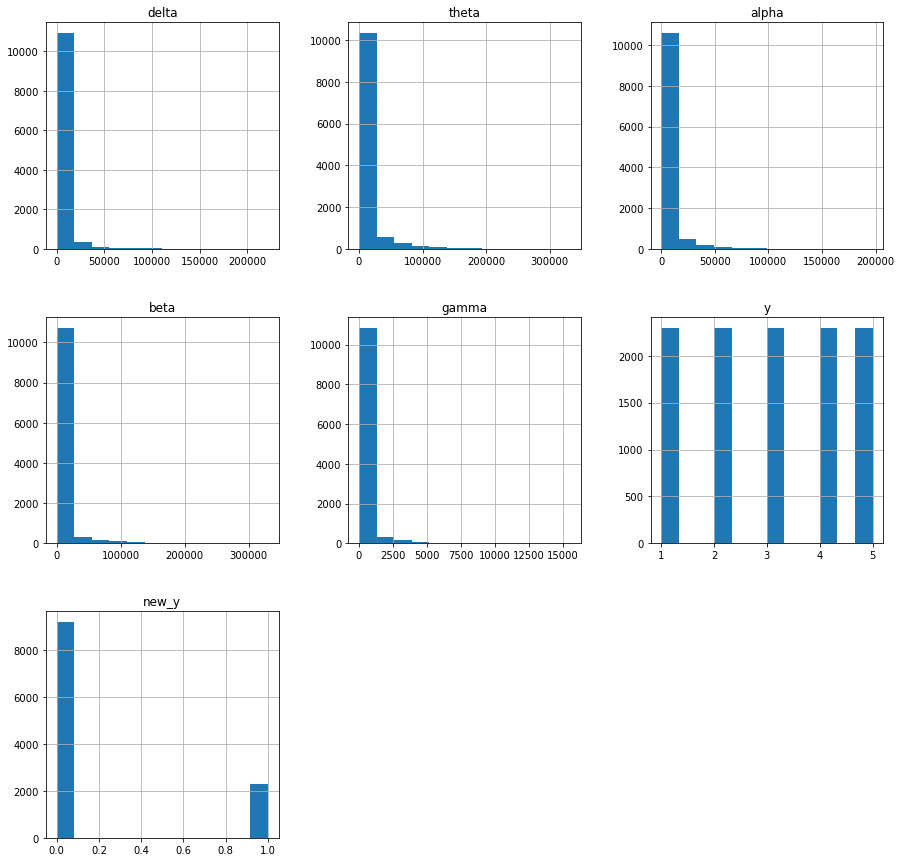

In [22]:
data.hist(bins = 12, figsize=(15, 15))

## Step 5: Correlation

In [23]:
data = data.drop(columns="y")


<AxesSubplot:>

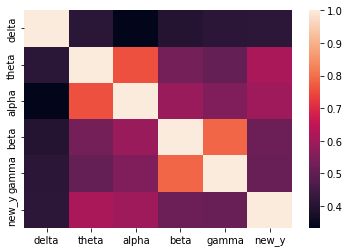

In [24]:
import seaborn as sns
# represent feature correlation matrix using a heatmap
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [25]:
corr["new_y"].sort_values(ascending=False)

new_y    1.000000
theta    0.615120
alpha    0.594110
beta     0.517360
gamma    0.512270
delta    0.412985
Name: new_y, dtype: float64

## Step 6: Split data into train and test sets

In [26]:
X = data.iloc[:, :-1]
y = data.new_y

<AxesSubplot:>

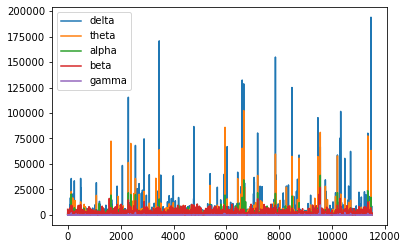

In [27]:
X[y==0].plot()

<AxesSubplot:>

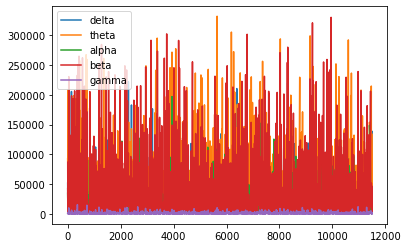

In [28]:
X[y==1].plot()

In [29]:
X

,delta,theta,alpha,beta,gamma
0,1763.171460,1097.645713,346.265657,5455.491542,100.415379
1,51782.146540,92636.066312,34656.071430,42376.131703,939.617819
2,483.216504,337.432485,470.583876,569.081604,31.745997
3,55.362609,38.882128,40.452648,98.880942,10.654423
4,243.705914,131.332749,196.750919,623.840240,69.604497
...,...,...,...,...,...
11495,353.443862,222.676817,279.076044,77.253435,21.519302
11496,910.639893,16408.753072,5915.591210,3194.646299,116.483395
11497,476.951537,114.692021,42.361577,651.726012,158.351793
11498,1508.080032,1104.822042,976.945176,206.714556,24.747383


#### Split the data into train and test sets

In [31]:
from sklearn.model_selection import train_test_split

# choosing stratify=y so that we get equal representation for both groups/labels in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train

,delta,theta,alpha,beta,gamma
2214,144.551251,379.027659,263.533779,1471.998351,25.261017
5847,594.523784,1101.431532,680.220387,316.619444,22.198686
6840,310.003014,140.953395,102.241942,274.860151,8.741568
5958,607.281602,1221.302449,1655.683797,465.719923,59.773029
4938,3955.527457,446.259225,113.793685,182.983299,34.950625
...,...,...,...,...,...
5365,62.381293,135.564903,69.168321,41.439494,4.275537
3085,21596.388809,7884.059282,5807.814048,9125.610704,254.340967
6758,64.939755,164.555809,384.772277,954.854682,80.856924
10286,5965.390821,3811.527608,1087.310732,702.784924,62.185918


## Selection of models

In [32]:
data.new_y.value_counts()

0    9200
1    2300
Name: new_y, dtype: int64

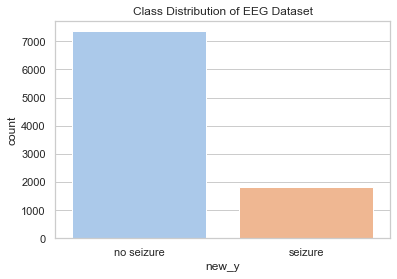

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics

#set seaborn styling & color palette
sns.set(style="whitegrid")
sns.set_palette("pastel")

#Using a countplot to show the distribution of the classes: fraud and no-fraud
bp = sns.countplot(x=y_train)
plt.title("Class Distribution of EEG Dataset")
bp.set_xticklabels(["no seizure","seizure"])
plt.show()

In [56]:
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

#### Logistic Regression

Hyperparameters used: penalty='l1', C=1.0, solver='liblinear'

In [39]:
clf_lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
scaler_lr = preprocessing.StandardScaler()
pipe_lr = Pipeline(steps=[('scaler', scaler_lr), ('Logistic Regression', clf_lr)])


#### Support Vector Machine
Hyperparameters used: C=1.0, kernel='linear', gamma='auto'

In [40]:
clf_svc = SVC(C=1.0, kernel='linear', gamma='auto')
scaler_svc = preprocessing.StandardScaler()
pipe_svc = Pipeline(steps=[('scaler', scaler_svc), ('SVC', clf_svc)])


#### K-Means
Hyperparameters used: n_clusters=2, n_init=10, max_iter=300

In [41]:
scaler_km = preprocessing.StandardScaler()
clf_km = KMeans(n_clusters=2, n_init=10, max_iter=300)
pipe_km = Pipeline(steps=[('scaler', scaler_km), ('KM', clf_km)])


#### Random Forest
Hyperparameters used: max_depth=2, random_state=42, n_estimators=10

In [42]:
clf_rf = RandomForestClassifier(max_depth=2, random_state=42, n_estimators=10)
scaler_rf = preprocessing.StandardScaler()
pipe_rf = Pipeline(steps=[('scaler', scaler_rf), ('RandomForestClassifier', clf_rf)])


### Cross validation with Pipeline

In [43]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()


In [186]:
sns.set_style("whitegrid", {'axes.grid' : False})

def cross_validate(pipe_obj, xdata, ydata):
    fig, ax = plt.subplots()
    fig.set_size_inches(10.5, 8.5)
    kfold = StratifiedKFold(n_splits=10).split(xdata, ydata)
    scores = []
    tprs = []
    aucs = []
    
    mean_fpr = np.linspace(0, 1, 100)
    for k, (train, test) in enumerate(kfold):
        pipe_obj.fit(xdata[train], ydata[train])
        score = pipe_obj.score(xdata[test], ydata[test])
        viz = metrics.plot_roc_curve(pipe_obj, xdata[test], ydata[test], 
                                 name="ROC fold {}".format(k), lw=1, ax=ax, alpha=1.)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        scores.append(score)
        y_pred_cv = pipe_obj.predict(xdata[test])
        print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,np.bincount(ydata[train]), 
                                                         score))
    
    print('CV accuracy: %.3f +/-%.3f' % (np.mean(scores), np.std(scores)))
    print('CV_AUC: %.3f +/-%.3f' % (np.mean(aucs), np.std(aucs)))
    
    cm = metrics.confusion_matrix(ydata[test], y_pred_cv)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color="b", 
            label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc), 
            lw=2, alpha=1.)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color="grey", alpha=0.2, 
                    label=r"$\pm$ 1 std. dev.")
    
    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], 
           title="Receiver operating characteristic")
    ax.legend(loc="lower right")
    
    disp.plot()
    plt.show()

Logistic Regression scores
Fold:  1, Class dist.: [6624 1656], Acc: 0.950
Fold:  2, Class dist.: [6624 1656], Acc: 0.959
Fold:  3, Class dist.: [6624 1656], Acc: 0.964
Fold:  4, Class dist.: [6624 1656], Acc: 0.941
Fold:  5, Class dist.: [6624 1656], Acc: 0.953
Fold:  6, Class dist.: [6624 1656], Acc: 0.965
Fold:  7, Class dist.: [6624 1656], Acc: 0.952
Fold:  8, Class dist.: [6624 1656], Acc: 0.966
Fold:  9, Class dist.: [6624 1656], Acc: 0.945
Fold: 10, Class dist.: [6624 1656], Acc: 0.933
CV accuracy: 0.953 +/-0.011
CV_AUC: 0.982 +/-0.008


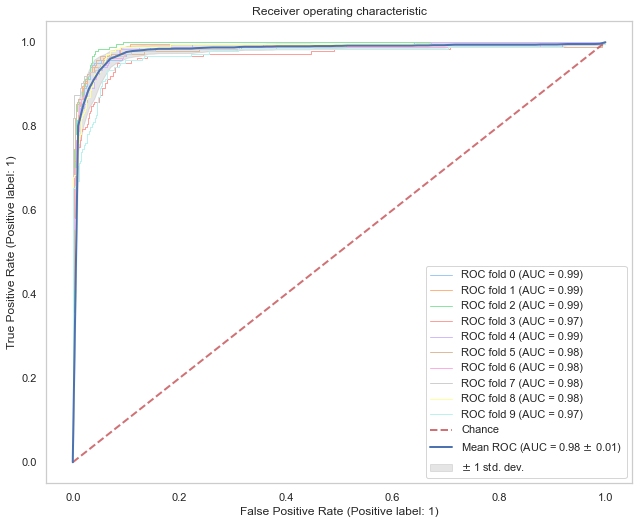

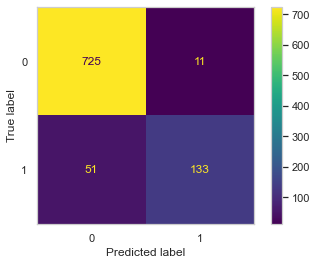

**************************
SVM scores
Fold:  1, Class dist.: [6624 1656], Acc: 0.958
Fold:  2, Class dist.: [6624 1656], Acc: 0.963
Fold:  3, Class dist.: [6624 1656], Acc: 0.966
Fold:  4, Class dist.: [6624 1656], Acc: 0.950
Fold:  5, Class dist.: [6624 1656], Acc: 0.958
Fold:  6, Class dist.: [6624 1656], Acc: 0.965
Fold:  7, Class dist.: [6624 1656], Acc: 0.960
Fold:  8, Class dist.: [6624 1656], Acc: 0.972
Fold:  9, Class dist.: [6624 1656], Acc: 0.951
Fold: 10, Class dist.: [6624 1656], Acc: 0.936
CV accuracy: 0.958 +/-0.010
CV_AUC: 0.986 +/-0.007


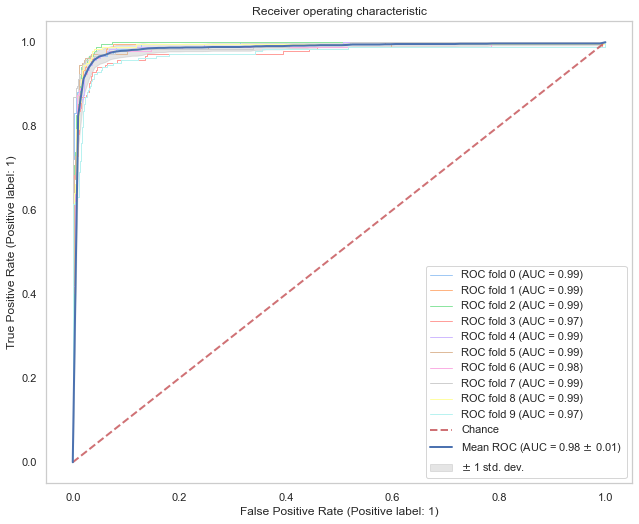

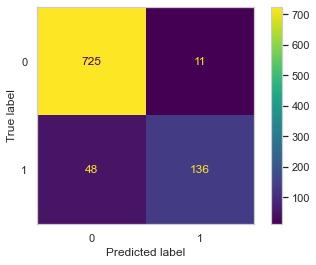

**************************
Random Forest scores
Fold:  1, Class dist.: [6624 1656], Acc: 0.986
Fold:  2, Class dist.: [6624 1656], Acc: 0.983
Fold:  3, Class dist.: [6624 1656], Acc: 0.989
Fold:  4, Class dist.: [6624 1656], Acc: 0.982
Fold:  5, Class dist.: [6624 1656], Acc: 0.982
Fold:  6, Class dist.: [6624 1656], Acc: 0.986
Fold:  7, Class dist.: [6624 1656], Acc: 0.982
Fold:  8, Class dist.: [6624 1656], Acc: 0.985
Fold:  9, Class dist.: [6624 1656], Acc: 0.984
Fold: 10, Class dist.: [6624 1656], Acc: 0.980
CV accuracy: 0.984 +/-0.003
CV_AUC: 0.996 +/-0.002


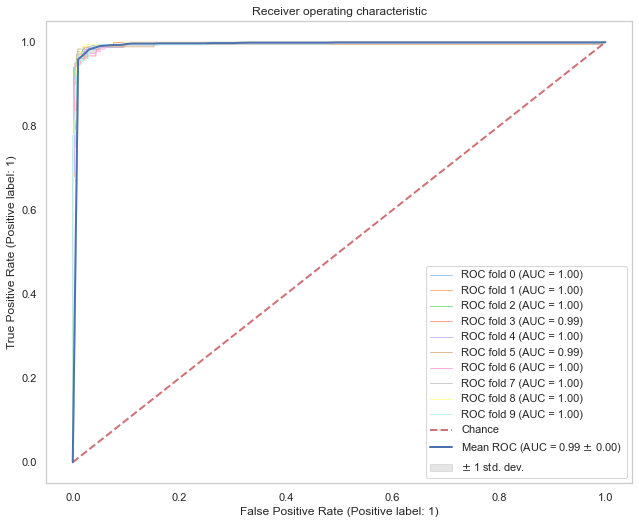

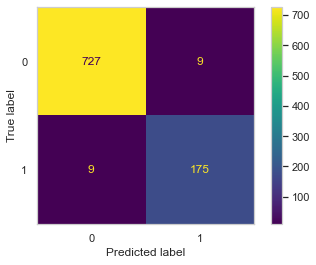

**************************
CPU times: user 6.81 s, sys: 65.9 ms, total: 6.87 s
Wall time: 6.87 s


In [188]:
%%time

print('Logistic Regression scores')
cross_validate(pipe_lr, X_train, y_train)
print('**************************')
print('SVM scores')
cross_validate(pipe_svc, X_train, y_train)
print('**************************')
print('Random Forest scores')
cross_validate(pipe_rf, X_train, y_train)
print('**************************')

In [191]:

def cross_validate_km(pipe_obj, xdata, ydata):
    kfold = StratifiedKFold(n_splits=10).split(xdata, ydata)
    scores = []
    tprs = []
    aucs = []
    
    for k, (train, test) in enumerate(kfold):
        pipe_obj.fit(xdata[train], ydata[train])
        score = pipe_obj.score(xdata[test], ydata[test])
        y_pred_cv = pipe_obj.predict(xdata[test])
        fpr, tpr, thresholds = metrics.roc_curve(ydata[test], y_pred_cv)
        aucs.append(metrics.auc(fpr, tpr))
        tprs.append(tpr)
        scores.append(score)
        print('Fold: %2d, Class dist.: %s, AUC: %.3f' % (k+1,np.bincount(ydata[train]), 
                                                             metrics.auc(fpr, tpr)))
        print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_pred_cv, ydata[test]))
        print("Completeness: %0.3f" % metrics.completeness_score(y_pred_cv, ydata[test]))
        print("V-measure: %0.3f" % metrics.v_measure_score(y_pred_cv, ydata[test]))
        print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(ydata[test], 
                                                                        y_pred_cv))
        print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(xdata[test], 
                                                                         ydata[test], 
                                                                         sample_size=1000))
        
    print('CV accuracy: %.3f +/-%.3f' % (np.mean(scores), np.std(scores)))
    print('CV_AUC: %.3f +/-%.3f' % (np.mean(aucs), np.std(aucs)))
    cm = metrics.confusion_matrix(ydata[test], y_pred_cv)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()


K-Means scores
Fold:  1, Class dist.: [6624 1656], AUC: 0.666
Homogeneity: 0.479
Completeness: 0.234
V-measure: 0.314
Adjusted Rand-Index: 0.364
Silhouette Coefficient: 0.708
Fold:  2, Class dist.: [6624 1656], AUC: 0.674
Homogeneity: 0.411
Completeness: 0.219
V-measure: 0.286
Adjusted Rand-Index: 0.374
Silhouette Coefficient: 0.698
Fold:  3, Class dist.: [6624 1656], AUC: 0.323
Homogeneity: 0.415
Completeness: 0.223
V-measure: 0.290
Adjusted Rand-Index: 0.379
Silhouette Coefficient: 0.700
Fold:  4, Class dist.: [6624 1656], AUC: 0.649
Homogeneity: 0.461
Completeness: 0.209
V-measure: 0.287
Adjusted Rand-Index: 0.331
Silhouette Coefficient: 0.694
Fold:  5, Class dist.: [6624 1656], AUC: 0.700
Homogeneity: 0.475
Completeness: 0.270
V-measure: 0.345
Adjusted Rand-Index: 0.429
Silhouette Coefficient: 0.705
Fold:  6, Class dist.: [6624 1656], AUC: 0.659
Homogeneity: 0.424
Completeness: 0.207
V-measure: 0.278
Adjusted Rand-Index: 0.347
Silhouette Coefficient: 0.705
Fold:  7, Class dist.: [6

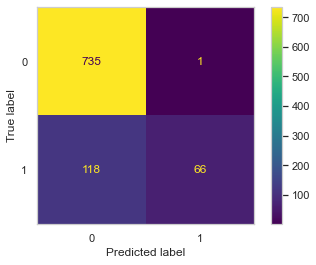

In [192]:
print('K-Means scores')
cross_validate_km(pipe_km, X_train, y_train)
# print('**************************')

### Observations:

- From the Confusion matrix, Random Forest has the fewest errors in classification.
- Logistic Regression and SVM have fewer False Positives.
- Random Forest has fewest False Negatives which means that fewer patients are classified as not having seizures when they are actually having seizures. This is a very important metric for this project.
- The ROC curves indicate that the Random Forest model is the best classifier for this dataset.
- This might change after fine tuning the parameters for each model.

## Justification for dimensionality reduction

Across the board, in general, I think the models did better with dimensionality reduction.

CPU time is reduced.
AUC is improved.

In [46]:
X_train_og, X_test_og, y_train_og, y_test_og = train_test_split(rows.to_numpy(), 
                                                                y.to_numpy(), 
                                                                test_size=0.2, 
                                                                stratify=y.to_numpy(), 
                                                                random_state=42)
X_train_og

array([[ -29,  -38,  -41, ...,   -9,   17,   23],
       [  21,   26,   38, ...,   49,   66,   48],
       [ -51,  -41,  -34, ...,  -27,  -28,  -18],
       ...,
       [  22,    1,  -12, ...,    0,   25,   46],
       [ -52,  -55,  -54, ..., -129, -137, -137],
       [ -53,  -37,  -21, ...,  -46,  -57,  -56]])

Logistic Regression scores
Fold:  1, Class dist.: [6624 1656], Acc: 0.825
Fold:  2, Class dist.: [6624 1656], Acc: 0.814
Fold:  3, Class dist.: [6624 1656], Acc: 0.827
Fold:  4, Class dist.: [6624 1656], Acc: 0.818
Fold:  5, Class dist.: [6624 1656], Acc: 0.820
Fold:  6, Class dist.: [6624 1656], Acc: 0.818
Fold:  7, Class dist.: [6624 1656], Acc: 0.820
Fold:  8, Class dist.: [6624 1656], Acc: 0.826
Fold:  9, Class dist.: [6624 1656], Acc: 0.814
Fold: 10, Class dist.: [6624 1656], Acc: 0.821
CV accuracy: 0.820 +/-0.004
CV_AUC: 0.529 +/-0.029


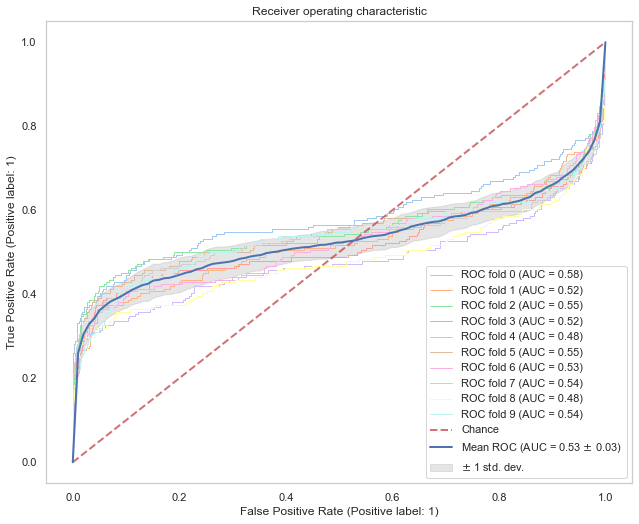

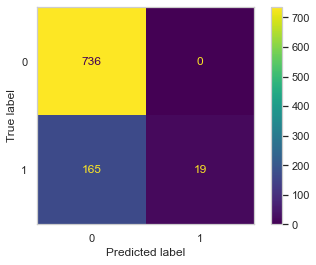

**************************
SVM scores
Fold:  1, Class dist.: [6624 1656], Acc: 0.828
Fold:  2, Class dist.: [6624 1656], Acc: 0.818
Fold:  3, Class dist.: [6624 1656], Acc: 0.826
Fold:  4, Class dist.: [6624 1656], Acc: 0.828
Fold:  5, Class dist.: [6624 1656], Acc: 0.828
Fold:  6, Class dist.: [6624 1656], Acc: 0.824
Fold:  7, Class dist.: [6624 1656], Acc: 0.827
Fold:  8, Class dist.: [6624 1656], Acc: 0.828
Fold:  9, Class dist.: [6624 1656], Acc: 0.822
Fold: 10, Class dist.: [6624 1656], Acc: 0.827
CV accuracy: 0.826 +/-0.003
CV_AUC: 0.533 +/-0.022


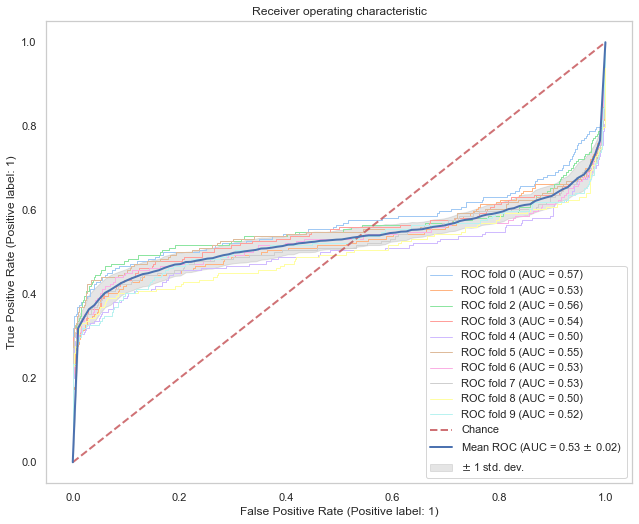

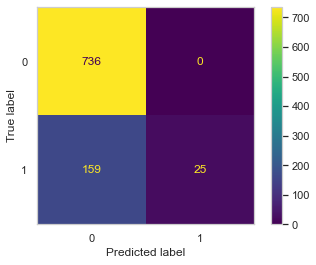

**************************
K-Means scores
Fold:  1, Class dist.: [6624 1656], AUC: 0.474
Homogeneity: 0.001
Completeness: 0.002
V-measure: 0.002
Adjusted Rand-Index: 0.012
Silhouette Coefficient: 0.514
Fold:  2, Class dist.: [6624 1656], AUC: 0.591
Homogeneity: 0.330
Completeness: 0.109
V-measure: 0.164
Adjusted Rand-Index: 0.205
Silhouette Coefficient: 0.506
Fold:  3, Class dist.: [6624 1656], AUC: 0.582
Homogeneity: 0.381
Completeness: 0.109
V-measure: 0.170
Adjusted Rand-Index: 0.187
Silhouette Coefficient: 0.511
Fold:  4, Class dist.: [6624 1656], AUC: 0.578
Homogeneity: 0.336
Completeness: 0.097
V-measure: 0.150
Adjusted Rand-Index: 0.178
Silhouette Coefficient: 0.501
Fold:  5, Class dist.: [6624 1656], AUC: 0.405
Homogeneity: 0.398
Completeness: 0.129
V-measure: 0.194
Adjusted Rand-Index: 0.216
Silhouette Coefficient: 0.514
Fold:  6, Class dist.: [6624 1656], AUC: 0.562
Homogeneity: 0.355
Completeness: 0.083
V-measure: 0.135
Adjusted Rand-Index: 0.144
Silhouette Coefficient: 0.51

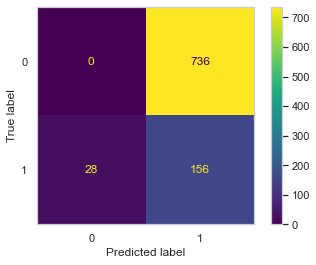

**************************
Random Forest scores
Fold:  1, Class dist.: [6624 1656], Acc: 0.957
Fold:  2, Class dist.: [6624 1656], Acc: 0.955
Fold:  3, Class dist.: [6624 1656], Acc: 0.965
Fold:  4, Class dist.: [6624 1656], Acc: 0.954
Fold:  5, Class dist.: [6624 1656], Acc: 0.960
Fold:  6, Class dist.: [6624 1656], Acc: 0.973
Fold:  7, Class dist.: [6624 1656], Acc: 0.961
Fold:  8, Class dist.: [6624 1656], Acc: 0.964
Fold:  9, Class dist.: [6624 1656], Acc: 0.954
Fold: 10, Class dist.: [6624 1656], Acc: 0.948
CV accuracy: 0.959 +/-0.007
CV_AUC: 0.990 +/-0.002


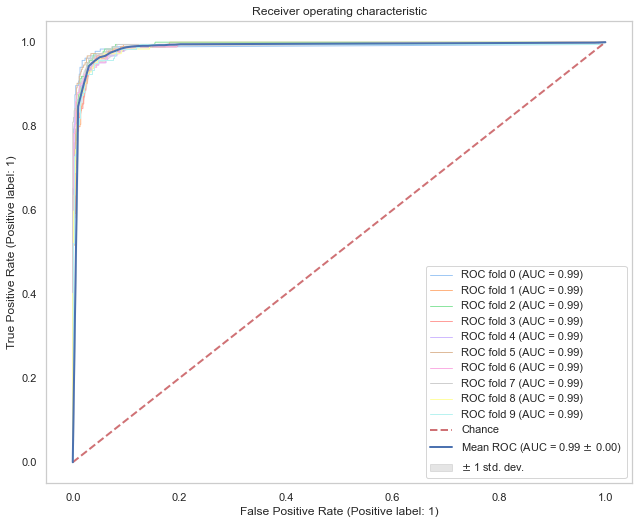

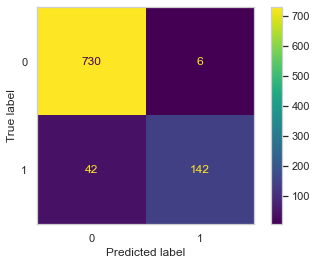

**************************
CPU times: user 6min 41s, sys: 8.74 s, total: 6min 50s
Wall time: 6min 22s


In [193]:
%%time

print('Logistic Regression scores')
cross_validate(pipe_lr, X_train_og, y_train_og)
print('**************************')
print('SVM scores')
cross_validate(pipe_svc, X_train_og, y_train_og)
print('**************************')
print('K-Means scores')
cross_validate_km(pipe_km, X_train_og, y_train_og)
print('**************************')
print('Random Forest scores')
cross_validate(pipe_rf, X_train_og, y_train_og)
print('**************************')

## Selected Model: Random Forest

In [194]:
def cross_validate_with_iters(pipe_obj, xdata, ydata):
    kfold = StratifiedKFold(n_splits=10).split(xdata, ydata)
    scores = []
    auc = []
    for k, (train, test) in enumerate(kfold):
        pipe_obj.fit(xdata[train], ydata[train])
        score = pipe_obj.score(xdata[test], ydata[test])
        scores.append(score)
        y_pred_cv = pipe_obj.predict(xdata[test])
        fpr, tpr, thresholds = metrics.roc_curve(ydata[test], y_pred_cv)
        auc.append(metrics.auc(fpr, tpr))
    cm = metrics.confusion_matrix(ydata[test], y_pred_cv)
    return np.mean(scores), np.mean(auc), cm

## Fine tuning the hyperparameters

The hyperparamters used are max_depth=2, random_state=42, n_estimators=10

In [196]:
%time

import itertools

# Define hyperparameters as lists for iterations
max_depth_options=[2, 5, 10, 20, 50]
n_estimators_options=[5, 10, 15, 20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

all_scores = []

sns.set_style("whitegrid", {'axes.grid' : False})

for iteration in list(itertools.product(max_depth_options,
                                        n_estimators_options,
                                       min_samples_split,
                                       min_samples_leaf,
                                       bootstrap)):
    # Define the classifer, scaler and pipeline
    clf_rf = RandomForestClassifier(max_depth=iteration[0], 
                                    random_state=0, 
                                    n_estimators=iteration[1],
                                   min_samples_split=iteration[2],
                                   min_samples_leaf=iteration[3],
                                   bootstrap=iteration[4])
    scaler_rf = preprocessing.StandardScaler()
    pipe_rf = Pipeline(steps=[('scaler', scaler_rf), ('RandomForestClassifier', clf_rf)])
    
    # Get scores from Cross validation
    iter_score, iter_auc, iter_cm = cross_validate_with_iters(pipe_rf, X_train, y_train)
    
    iter_details = {"max_depth_options":iteration[0], 
                    'n_estimators_options':iteration[1],
                    'min_samples_split':iteration[2],
                    'min_samples_leaf':iteration[3],
                    'bootstrap':iteration[4],
                    'Scores':iter_score,
                    'AUC':iter_auc
                   }
    all_scores.append(iter_details)
    
# Set the style (no gridlines)
sns.set_style("whitegrid", {'axes.grid' : False})



CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs


In [197]:
import pandas as pd

df = pd.DataFrame(all_scores)
df

,max_depth_options,n_estimators_options,min_samples_split,min_samples_leaf,bootstrap,Scores,AUC
0,2,5,2,1,True,0.971957,0.952514
1,2,5,2,1,False,0.970652,0.948438
2,2,5,2,2,True,0.971957,0.952514
3,2,5,2,2,False,0.970652,0.948438
4,2,5,2,4,True,0.971957,0.952514
...,...,...,...,...,...,...,...
355,50,20,10,1,False,0.982717,0.973302
356,50,20,10,2,True,0.982500,0.973370
357,50,20,10,2,False,0.982609,0.973030
358,50,20,10,4,True,0.981848,0.972554


In [198]:
df.sort_values(by="Scores", ascending=False)

,max_depth_options,n_estimators_options,min_samples_split,min_samples_leaf,bootstrap,Scores,AUC
205,10,20,5,1,False,0.983696,0.974524
187,10,15,5,1,False,0.983370,0.974728
203,10,20,2,4,False,0.983152,0.973777
209,10,20,5,4,False,0.983152,0.973777
211,10,20,10,1,False,0.983043,0.972894
...,...,...,...,...,...,...,...
39,2,15,2,2,False,0.969348,0.947215
53,2,15,10,4,False,0.969348,0.947215
37,2,15,2,1,False,0.969348,0.947215
47,2,15,5,4,False,0.969348,0.947215


### Using RandomizedSearchCV(logistic, distributions, random_state=0)

In [199]:
max_depth_options=[2, 5, 10, 20, 50]
# random_state_options=[5, 10, 15, 20, 30, 40, 50]
n_estimators_options=[5, 10, 15, 20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_forest = RandomForestClassifier(random_state=0)
distributions = dict(max_depth=max_depth_options,
                     n_estimators=n_estimators_options,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    bootstrap=bootstrap)
clf = RandomizedSearchCV(random_forest, distributions, random_state=0, n_iter=300)
search = clf.fit(X_train, y_train)
search.best_params_

{'n_estimators': 20,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 10,
 'bootstrap': True}

- The best parameters according to RandomizedSearchCV and all combinations of parameters using itertools are:
- {'n_estimators': 20,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 10,
 'bootstrap': True}
- The bootstrap value doesn't seem to affect the outcome. 
- The RandomizedSearchCV performed much faster.

## Testing the model

In [224]:
clf_rf = RandomForestClassifier(max_depth=10, random_state=0, 
                                n_estimators=20, min_samples_split=5, 
                                min_samples_leaf=1, bootstrap=False)
scaler_rf = preprocessing.StandardScaler()
pipe_rf = Pipeline(steps=[('scaler', scaler_rf), ('RandomForestClassifier', clf_rf)])
pipe_rf.fit(X_train, y_train)

y_pred = pipe_rf.predict(X_test)

In [225]:
y_pred

array([0, 0, 0, ..., 1, 1, 0])

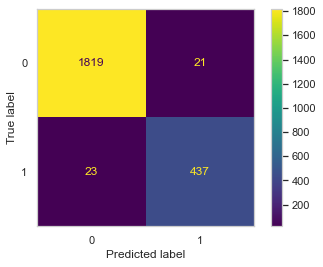

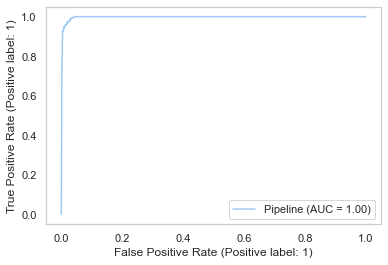

In [226]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

metrics.plot_roc_curve(pipe_rf,X_test,y_test, drop_intermediate=False)


In [227]:
pipe_rf.score(X_test, y_test)

0.9808695652173913

In [228]:
metrics.auc(fpr, tpr)

0.9692934782608695

## Future Work to be done

- 23 cases were predicted to be non-seizures but turned out to be seizures. I want to work on reducing that number
- Check the results of adjusting the bands that were calculated and define their overlaps  differently to further fine tune the model
- Use the raw EEG data to predict the results
- Use Neural Networks to see if it performs differently
